In [175]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from IPython.display import Markdown, display

%matplotlib inline

In [176]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [193]:
df = pd.read_csv("tweets_depression.csv")
df.tweet.drop_duplicates(inplace=True)
df.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0
3,2020-08-31 21:48:34,wralweather,A Hurricane Hunter aircraft is flying into an ...,[],0
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0


In [194]:
df.tweet = df.tweet.str.replace("<NEWLINE>", " ")
clean = ['great depression', 'hurricane']

for i, row in df.iterrows():
    tweet = str(row['tweet']).lower().split(" ")
    for c in clean:
        if c in tweet:
            df.drop(index=i, inplace=True)
            break
df.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0
5,2020-08-31 21:48:32,livingbeige,she said he went camping to “heal”.... okay wh...,[],0


In [164]:
tweets = list(df.tweet.str.lower())

for tweet in tweets[:3]:
    tweet = tweet.lower().replace("'", "")
    analysis = TextBlob(tweet)
    sent = analysis.sentiment
    
    if sent[0] > 0:
        color = "green"
    elif sent[0] < 0:
        color = "red"
    else:
        color = "gray"
    display(Markdown(f"<span style='color:{color}'>{tweet}</span>"))

<span style='color:gray'>hangover depression is a thing and it is well and truly, a bastard.</span>

<span style='color:gray'>faltering fiscal policy raises the odds of a depression.  https://twitter.com/byheatherlong/status/1300486994263511042 …</span>

<span style='color:green'>in my headcannon he divorsed, and after a couple months of depression he get´s the mental strength to go to therapy and finish med school! he ended up saving his exwife´s life! and both stay as very good friends and...  wait what... ohh yeah, behind the scenes:  pic.twitter.com/6tgsf6ykdz</span>

In [165]:
sentiments = []

for tweet in tweets:
    tweet = tweet.lower().replace("'", "")
    analysis = TextBlob(tweet)
    sent = analysis.sentiment
    
    if sent[0] > 0:
        category = "positive"
    elif sent[0] < 0:
        category = "negative"
    else:
        category = "neutral"
    sentiments.append(category)
df["sentiment"] = sentiments
df.head()

,date,username,tweet,hashtags,nlikes,sentiment
0,2020-08-31 21:48:38,ajk_,Hangover depression is a thing and it is well ...,[],0,neutral
1,2020-08-31 21:48:37,Macroprupolicy,Faltering fiscal policy raises the odds of a d...,[],0,neutral
2,2020-08-31 21:48:34,bolio_93,"In my headcannon he divorsed, and after a coup...",[],0,positive
4,2020-08-31 21:48:32,Zinotox,September 27th - you mean the day I fly back t...,[],0,positive
5,2020-08-31 21:48:32,livingbeige,she said he went camping to “heal”.... okay wh...,[],0,positive


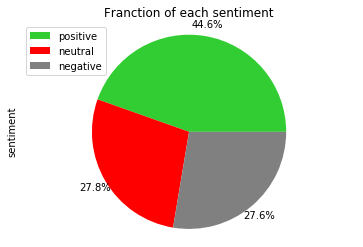

In [148]:
df.sentiment.value_counts().plot(kind="pie",
                               autopct='%1.1f%%',
                               labels=None,
                               pctdistance=1.12,
                               colors=["limegreen", "red", "gray"])
plt.axis('equal')
plt.title("Franction of each sentiment")
plt.legend(labels=df.sentiment.value_counts().index, loc="upper left")
plt.show()

In [77]:
stopwords = set(STOPWORDS)
stopwords.add("xa0")
stopwords.add("https")
stopwords.add("twitter")
stopwords.add("tweet")
stopwords.add("pic")

def create_wordcloud(tweets, bg_color):
    wordcloud = WordCloud(
        background_color=bg_color,
        width=1000,
        height=500,
        contour_color='steelblue',
        stopwords=stopwords).generate(str(tweets))
    return wordcloud

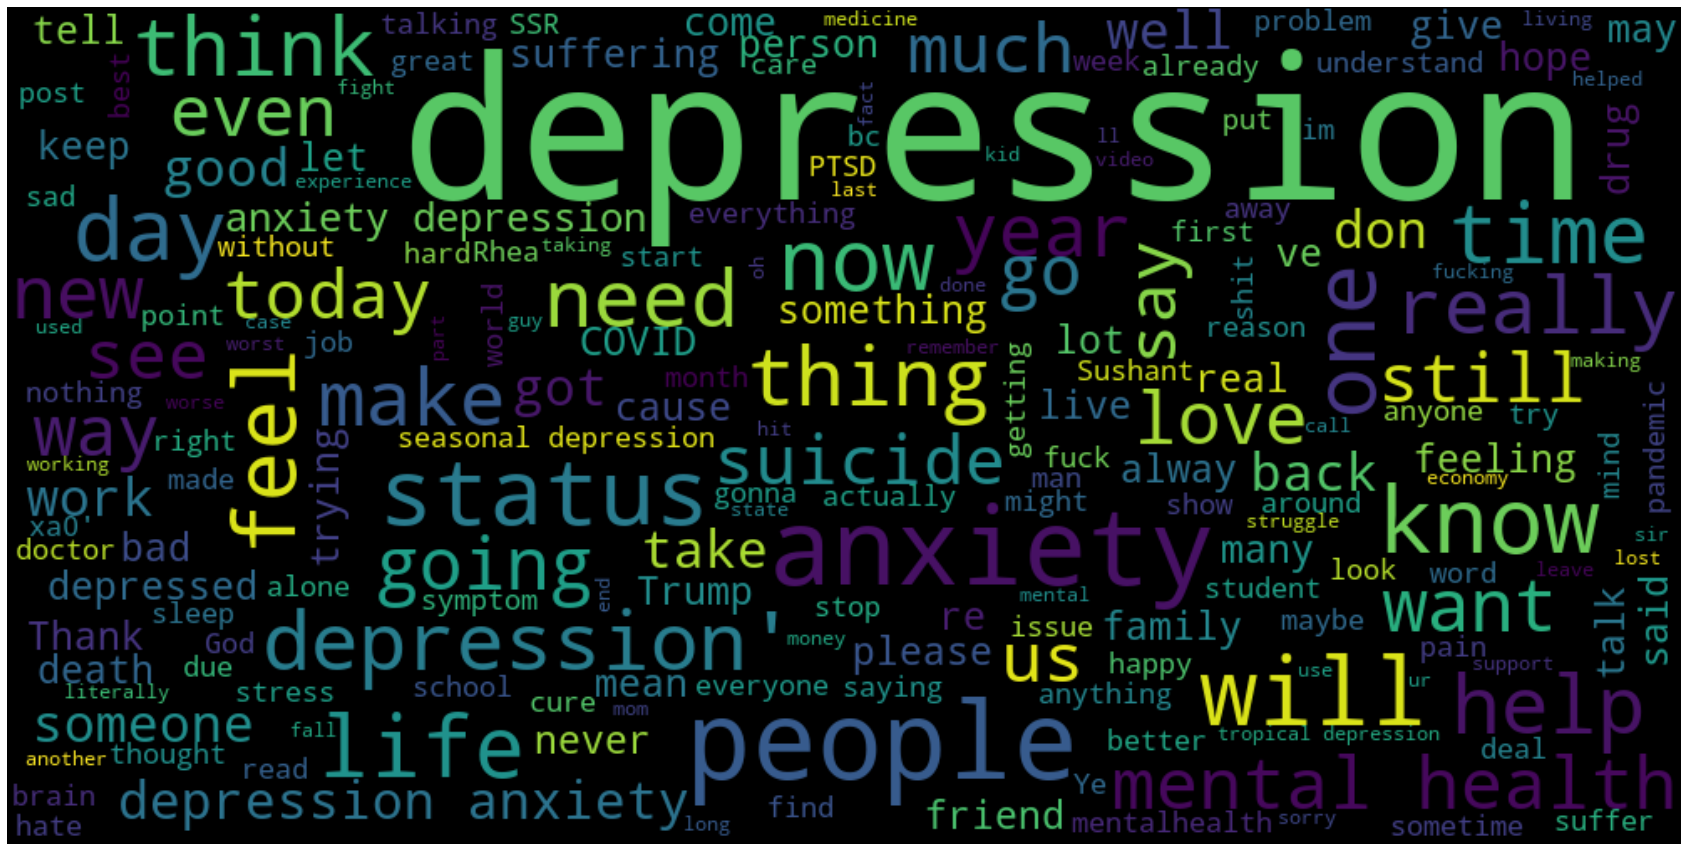

In [131]:
wordcloud = create_wordcloud(set(df.tweet), "black")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.rcParams["figure.figsize"] = 30, 30

In [132]:
df_random = pd.read_csv("tweets_random.csv")
df_random.head()

,date,username,tweet,hashtags,nlikes
0,2020-08-31 21:39:04,RobertPRowley2,I'd be swinging from the ceiling light. https...,[],0
1,2020-08-30 23:57:17,Wprostbiznes,W. ➡️ https://premium.wprost.pl/10357487/armag...,[],37
2,2020-08-31 21:39:04,lucisbeer,ok but would anyone wanna join and be fcking A...,[],0
3,2020-08-31 21:39:04,DanDaggerDick,Omg hi may i dm you?,[],0
4,2020-08-31 21:39:04,realMarkMoney,"I love your work, but you’re just wrong on thi...",[],0


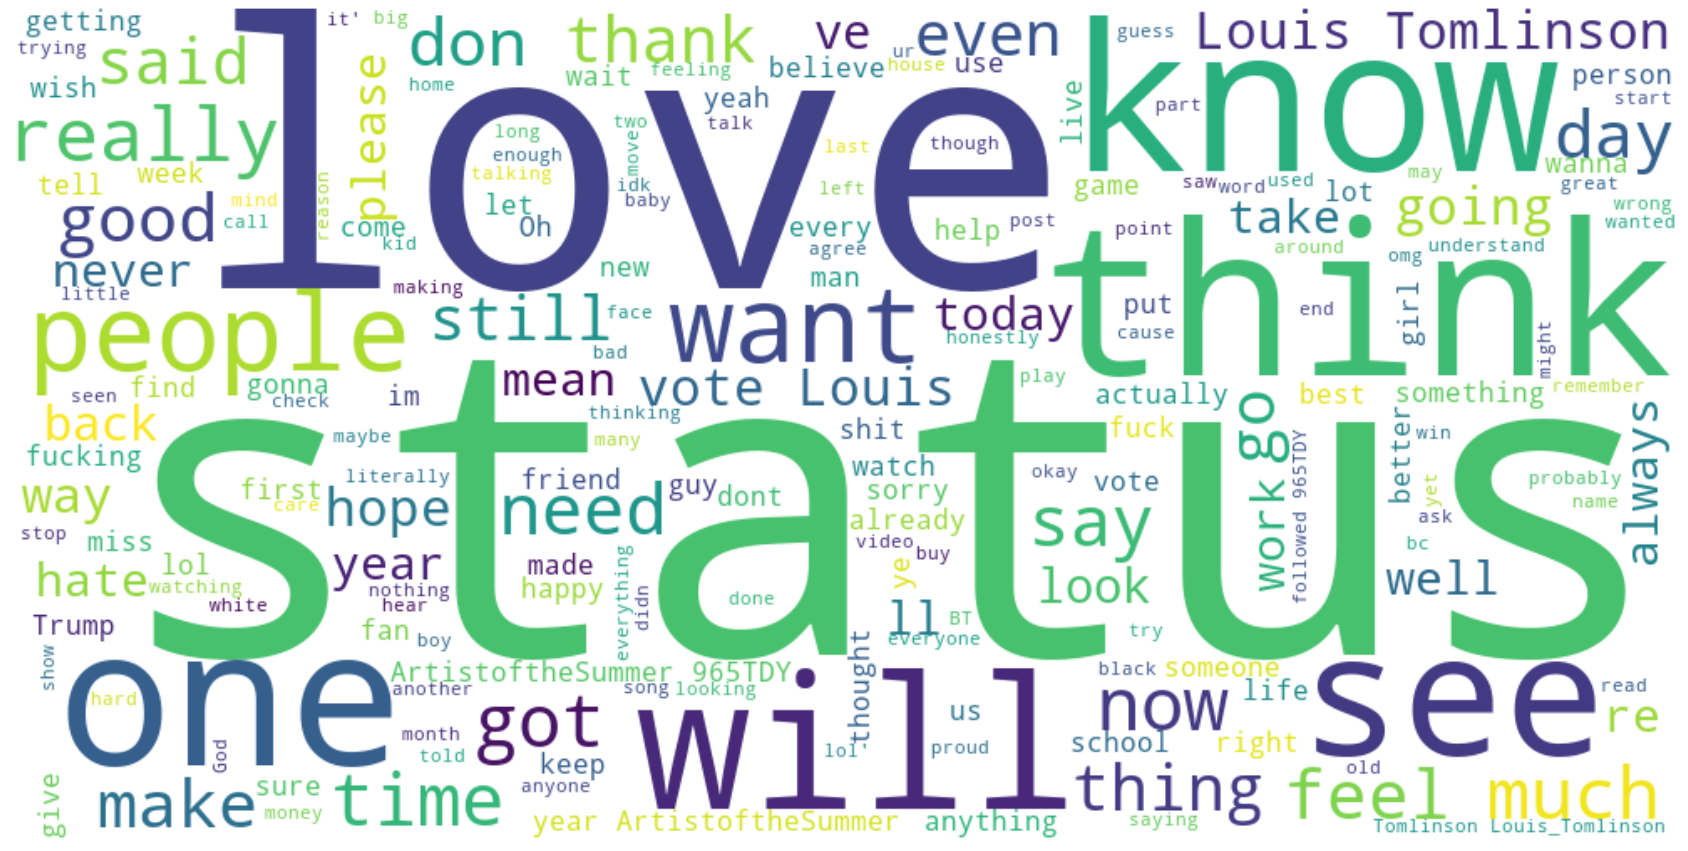

In [133]:
wordcloud = create_wordcloud(set(df_random.tweet), "white")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.rcParams["figure.figsize"] = 30, 30

In [135]:
sentiments = []

for tweet in list(df_random.tweet):
    analysis = TextBlob(tweet)
    sent = analysis.sentiment
    
    if sent[0] > 0:
        category = "positive"
    elif sent[0] < 0:
        category = "negative"
    else:
        category = "neutral"
    sentiments.append(category)
df_random["sentiment"] = sentiments
df_random.head()

,date,username,tweet,hashtags,nlikes,sentiment
0,2020-08-31 21:39:04,RobertPRowley2,I'd be swinging from the ceiling light. https...,[],0,positive
1,2020-08-30 23:57:17,Wprostbiznes,W. ➡️ https://premium.wprost.pl/10357487/armag...,[],37,neutral
2,2020-08-31 21:39:04,lucisbeer,ok but would anyone wanna join and be fcking A...,[],0,positive
3,2020-08-31 21:39:04,DanDaggerDick,Omg hi may i dm you?,[],0,neutral
4,2020-08-31 21:39:04,realMarkMoney,"I love your work, but you’re just wrong on thi...",[],0,positive


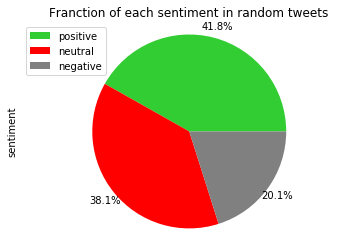

In [150]:
df_random.sentiment.value_counts().plot(kind="pie",
                               autopct='%1.1f%%',
                               labels=None,
                               pctdistance=1.12,
                               colors=["limegreen", "red", "gray"])
plt.axis('equal')
plt.title("Franction of each sentiment in random tweets")
plt.legend(labels=df.sentiment.value_counts().index, loc="upper left")
plt.show()

## Word2Vec

In [195]:
import tensorflow as tf
from tensorflow.keras import layers as ly
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer

In [215]:
tweets = []
for line in list(set(df.tweet))[1:]:
    line = str(line)
    for word in line.split(" "):
        if word in stopwords.words():
            line = line.replace(word + " ", "")
    tweets.append(line)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets)
total_words = len(tokenizer.word_index) + 1

In [220]:
tokenizer.word_index

{'depression': 1,
 'i': 2,
 'com': 3,
 'twitter': 4,
 'anxiety': 5,
 'https': 6,
 'pic': 7,
 'like': 8,
 'people': 9,
 'it': 10,
 'the': 11,
 'you': 12,
 'status': 13,
 'get': 14,
 'know': 15,
 'mental': 16,
 'i’m': 17,
 'feel': 18,
 'life': 19,
 'health': 20,
 'it’s': 21,
 'help': 22,
 'great': 23,
 'day': 24,
 'time': 25,
 'really': 26,
 'think': 27,
 'and': 28,
 "i'm": 29,
 'go': 30,
 'me': 31,
 'my': 32,
 'even': 33,
 'going': 34,
 'need': 35,
 'we': 36,
 'us': 37,
 'don’t': 38,
 'love': 39,
 'much': 40,
 'but': 41,
 'back': 42,
 'www': 43,
 'suicide': 44,
 'good': 45,
 'today': 46,
 'to': 47,
 'still': 48,
 'family': 49,
 'now': 50,
 'since': 51,
 'many': 52,
 'things': 53,
 'see': 54,
 'please': 55,
 'this': 56,
 'would': 57,
 'got': 58,
 '2': 59,
 'years': 60,
 'a': 61,
 'so': 62,
 'never': 63,
 'if': 64,
 'make': 65,
 'in': 66,
 'way': 67,
 'covid': 68,
 'that': 69,
 'well': 70,
 'is': 71,
 'better': 72,
 'new': 73,
 'say': 74,
 'he': 75,
 'every': 76,
 'stress': 77,
 'no': 78,

In [227]:
count = 0
for i in tokenizer.word_index:
    print(i.upper())
    count += 1
    if count > 20:
        break

DEPRESSION
I
COM
TWITTER
ANXIETY
HTTPS
PIC
LIKE
PEOPLE
IT
THE
YOU
STATUS
GET
KNOW
MENTAL
I’M
FEEL
LIFE
HEALTH
IT’S


In [247]:
DIMS = 300
MAX_LENGTH = 280
SPLIT = 0.1

In [246]:
sequences = tokenizer.texts_to_sequences(tweets)
padded = pad_sequences(sequences, padding="post", truncating="post", maxlen=MAX_LENGTH)

split = int(len(tweets) * SPLIT)
train_x = 

In [244]:
model = Sequential([
    ly.Embedding(total_words, DIMS, input_length=MAX_LENGHT),
    ly.Conv1D(32, 3, activation='relu'),
    ly.MaxPooling1D(),
    ly.Dropout(0.5),
    ly.LSTM(300),
    ly.Dropout(0.5),
    ly.Dense(1, "sigmoid")
])

In [245]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 280, 300)          8283000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 278, 32)           28832     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 139, 32)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 139, 32)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_11 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [242]:
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])